In [ ]:
import torch
import torch.nn as nn

# 定义输入维度和输出维度
in_features = 10
out_features = 5

# 创建一个 nn.Linear 实例
linear_layer = nn.Linear(in_features, out_features)

# 随机生成输入张量
input_tensor = torch.randn(3, in_features)  # batch size = 3

# 将输入张量传入线性层进行线性变换
output = linear_layer(input_tensor)

# 打印输出结果和权重矩阵、偏置向量
print("Input shape:", input_tensor.shape)
print("Output shape:", output.shape)
print("Weight matrix shape:", linear_layer.weight.shape)
print("Bias vector shape:", linear_layer.bias.shape)


In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
import matplotlib.pyplot as plt

# 设置参数
n = 1000  # 数据点个数
d0 = 2  # 数据维度
mean1 = torch.tensor([1.0, 1.0])  # 第一个正态分布的均值
std1 = 1.0  # 第一个正态分布的标准差
mean2 = torch.tensor([5.0, 5.0])  # 第二个正态分布的均值
std2 = 1.0  # 第二个正态分布的标准差

# 生成数据
data1 = torch.normal(mean1, std1, size=(n // 2, d0))
data2 = torch.normal(mean2, std2, size=(n - n // 2, d0))
data = torch.cat((data1, data2), dim=0)

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


TypeError: normal() received an invalid combination of arguments - got (Tensor, float, size=tuple), but expected one of:
 * (Tensor mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (Tensor mean, float std, *, torch.Generator generator, Tensor out)
 * (float mean, Tensor std, *, torch.Generator generator, Tensor out)
 * (float mean, float std, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


torch.Size([10000, 3])


d:\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


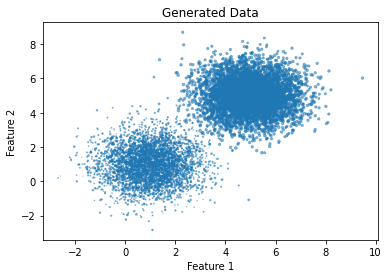

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import torch
import matplotlib.pyplot as plt

# 设置参数
n = 10000  # 数据点个数
d0 = 2  # 数据维度

# 生成数据
np.random.seed(42)
data1 = np.random.normal(loc=1.0, scale=1.0, size=(n // 2, d0))
data2 = np.random.normal(loc=5.0, scale=1.0, size=(n - n // 2, d0))
data = np.concatenate((data1, data2), axis=0)

# 将NumPy数组转换为PyTorch张量
data = torch.tensor(data, dtype=torch.float)
print(data.size()) #(b,d)
# 可视化数据
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 设置参数
n = 1000  # 数据点个数
d0 = 2  # 数据维度

# 生成数据
np.random.seed(42)
data1 = np.random.normal(loc=1.0, scale=1.0, size=(n // 2, d0))
data2 = np.random.normal(loc=5.0, scale=1.0, size=(n - n // 2, d0))
data = np.concatenate((data1, data2), axis=0)

# 将NumPy数组转换为PyTorch张量
data = torch.tensor(data, dtype=torch.float)

# 删除超出三个标准差范围之外的数据
mean = torch.mean(data, dim=0)
std = torch.std(data, dim=0)
threshold = 3 * std
mask = torch.all(torch.abs(data - mean) <= threshold, dim=1)
filtered_data = data[mask]

# 可视化处理后的数据
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], alpha=0.5)
plt.title('Filtered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


: 

In [1]:
import torch
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#随机种子
seed = 35
torch.manual_seed(seed)
# 设置参数
n = 4  # 簇的数量
d = 2  # 数据维度

# 生成 n 个簇的随机数据
cluster_data = []
for i in range(n):
    mean = torch.randn(d) * 5  # 随机生成每个簇的均值
    std = torch.rand(d) + 1.0  # 随机生成每个簇的标准差
    cluster_size = torch.randint(low=50, high=100, size=(1,))  # 每个簇的数据点数量
    cluster = torch.randn(cluster_size, d) * std + mean
    cluster_data.append(cluster)

# 生成第 n+1 簇数据
far_mean = torch.randn(d) * 20  # 选择一个远离前 n 簇数据的均值
far_std = torch.rand(d) + 1.0  # 随机生成标准差
far_cluster_size = torch.randint(low=50, high=100, size=(1,))  # 第 n+1 簇数据点数量
far_cluster = torch.randn(far_cluster_size, d) * far_std + far_mean

# 可视化数据
plt.figure(figsize=(8, 6))
for cluster in cluster_data:
    plt.scatter(cluster[:, 0], cluster[:, 1])
plt.scatter(far_cluster[:, 0], far_cluster[:, 1], marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data')
plt.show()


: 

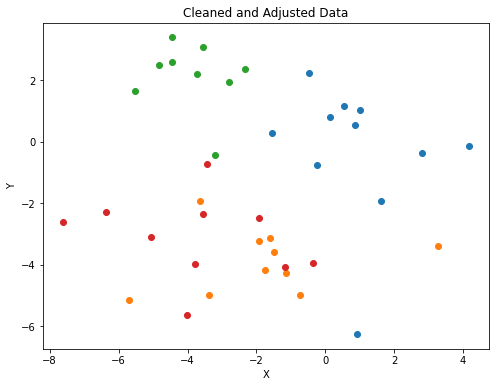

In [9]:
import torch
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# 设置随机种子
seed = 42
torch.manual_seed(seed)

# 生成 n 个簇的随机数据
n = 4  # 簇的数量
d = 2  # 数据维度
N = 40  # 总数据量

cluster_data = []
for i in range(n):
    mean = torch.randn(d) * 5  # 随机生成每个簇的均值
    std = torch.rand(d) + 1.0  # 随机生成每个簇的标准差
    cluster_size = int(N / n)  # 每个簇的数据点数量
    cluster = torch.randn(cluster_size, d) * std + mean
    
    # 清理数据：删除超出三个标准差范围之外的数据点
    mask = (cluster > (mean - 3 * std)) & (cluster < (mean + 3 * std))
    mask = mask.all(dim=1)
    cleaned_cluster = cluster[mask]
    
    cluster_data.append(cleaned_cluster)

# 调整每个簇的数据数量，使得所有簇的数据总量为 N
total_points = sum(len(cluster) for cluster in cluster_data)
if total_points < N:
    # 增加数据点
    remaining_points = N - total_points
    for i in range(remaining_points):
        idx = i % n  # 循环添加数据点以平衡各个簇的数据数量
        new_point = torch.randn(1, d) * std + mean
        cluster_data[idx] = torch.cat([cluster_data[idx], new_point])

# 可视化数据
plt.figure(figsize=(8, 6))
for cluster in cluster_data:
    plt.scatter(cluster[:, 0], cluster[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cleaned and Adjusted Data')
plt.show()


In [3]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss.backward()
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = F.cross_entropy(input, target)
print(input,target,loss)
loss.backward()

tensor([[ 0.4694,  0.7190,  1.2058, -0.6610, -0.4060],
        [-1.3675,  0.6235, -0.6287,  1.6668, -0.8180],
        [-0.8031, -0.7653,  0.8086, -0.1027,  0.9279]], requires_grad=True) tensor([[0.1159, 0.0667, 0.0750, 0.5748, 0.1676],
        [0.1715, 0.0712, 0.1212, 0.1782, 0.4579],
        [0.0628, 0.0445, 0.3963, 0.2739, 0.2225]]) tensor(2.0994, grad_fn=<DivBackward1>)
